<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/I4_0__linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso



In [2]:
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"
!rm grafikon.py.*
from grafikon import grafikon

--2024-02-11 20:13:37--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2539 (2.5K) [text/plain]
Saving to: ‘grafikon.py.1’

grafikon.py.1       100%[===================>]   2.48K  --.-KB/s    in 0s      

2024-02-11 20:13:37 (31.7 MB/s) - ‘grafikon.py.1’ saved [2539/2539]



In [3]:
drive.mount('/content/drive', readonly=True,force_remount=True )

Mounted at /content/drive


In [4]:
user = "SL"

In [5]:

if user=="NKF":
    path = "/content/drive/MyDrive/*"
else:
    path = "/content/drive/MyDrive/adatok_szakdoga/adatok_20210201_20240101/df_osszes.csv"

In [6]:
df_osszes=pd.read_csv(path,)

In [7]:
df_osszes["Timestamp"]=pd.to_datetime(df_osszes["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [8]:
df_osszes.set_index("Timestamp",inplace=True)

In [9]:
del(df_osszes["Unnamed: 0"] )

In [10]:
df_osszes["Szum_metanol"]=df_osszes["Meleg_tartaly_szint"]+df_osszes["Hideg_tartaly_szint"]

In [11]:
#df_osszes=df_osszes.astype(int)

In [12]:
df_mini = df_osszes.filter(['Szum_metanol','Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'], axis=1)

In [13]:
df_mini.describe()

,Szum_metanol,Szteroid2_uni_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom,Szintetikus3_1_rhv_hom,...,Szintetikus3_3_rhv_hom,Szintetikus3_4_rhv_hom,Szintetikus3_hidr_rhv_hom,Szintetikus1_1_rhv_hom,Szintetikus1_2_rhv_hom,Szintetikus1_3_rhv_hom,Szintetikus1_4_rhv_hom,Szintetikus1_5_rhv_hom,Szintetikus1_6_rhv_hom,Oldoszer_rhv_elore_hom
count,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,...,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06
mean,1.037296e+02,1.791602e+01,1.866796e+01,1.842537e+01,1.779770e+01,1.735590e+01,2.066038e+01,1.786041e+01,1.774129e+01,1.906506e+01,...,1.772424e+01,1.855604e+01,2.046158e+01,2.103953e+01,1.996895e+01,2.076945e+01,2.163324e+01,2.079118e+01,1.990206e+01,1.956564e+01
std,1.210746e+01,3.938346e+00,3.974075e+00,4.476605e+00,3.776185e+00,3.746389e+00,4.717789e+00,4.145986e+00,3.863727e+00,3.571611e+00,...,3.894463e+00,4.098838e+00,6.005507e+00,4.374065e+00,3.781432e+00,4.050601e+00,4.918608e+00,3.974792e+00,4.257373e+00,4.580713e+00
min,0.000000e+00,0.000000e+00,-5.000000e+01,-2.508000e+01,-2.504000e+01,-2.501000e+01,-1.900024e-01,-1.700020e-01,-5.000000e+01,0.000000e+00,...,-2.511500e+01,-2.512500e+01,-5.000000e+01,-5.000000e+01,-5.000000e+01,-4.282000e+01,-5.000000e+01,-5.000000e+01,-4.500198e-02,0.000000e+00
25%,9.548014e+01,1.514000e+01,1.587500e+01,1.525000e+01,1.509000e+01,1.463499e+01,1.781000e+01,1.492001e+01,1.492499e+01,1.675000e+01,...,1.497500e+01,1.569500e+01,1.662500e+01,1.844247e+01,1.760008e+01,1.815500e+01,1.879000e+01,1.880000e+01,1.747500e+01,1.707154e+01
50%,1.030017e+02,1.855500e+01,1.905500e+01,1.887500e+01,1.857500e+01,1.813500e+01,2.014500e+01,1.847500e+01,1.834000e+01,1.944000e+01,...,1.828000e+01,1.898000e+01,1.985000e+01,2.146022e+01,2.060105e+01,2.040000e+01,2.155500e+01,2.110001e+01,2.088000e+01,2.070333e+01
75%,1.111282e+02,2.078500e+01,2.104500e+01,2.073000e+01,2.055000e+01,2.024500e+01,2.306500e+01,2.040000e+01,2.040000e+01,2.118500e+01,...,2.026500e+01,2.077000e+01,2.321250e+01,2.363088e+01,2.258063e+01,2.335000e+01,2.423500e+01,2.311250e+01,2.275000e+01,2.259892e+01
max,1.526011e+02,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,4.989000e+01,5.995000e+01,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,3.870854e+01


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

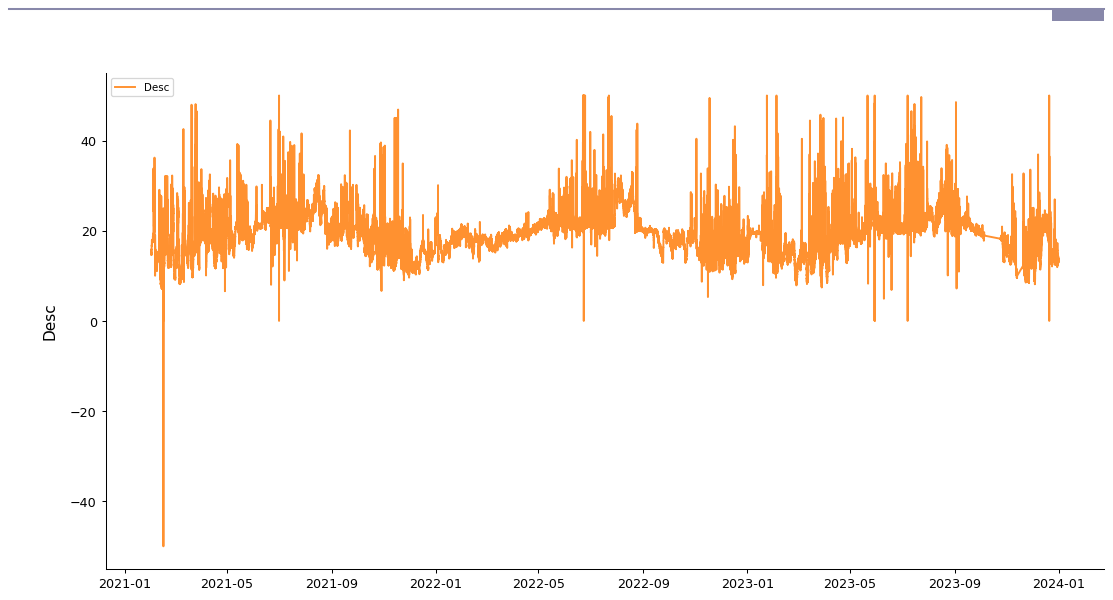

In [14]:
grafikon(df_mini,"Szteroid2_2_rhv_hom","Desc")

In [15]:
df_mini=df_mini[df_mini.Szteroid2_2_rhv_hom>-45.0]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

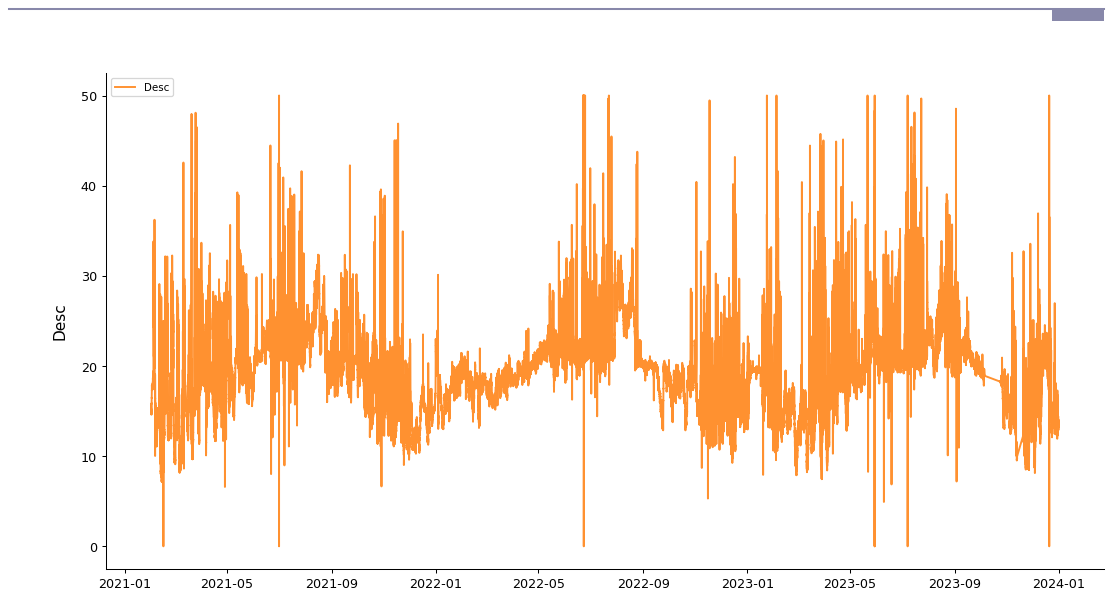

In [16]:
grafikon(df_mini,"Szteroid2_2_rhv_hom","Desc")

In [17]:
y=df_mini.Szum_metanol
X=df_mini.filter(['Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'])

In [18]:
linreg=LinearRegression()

In [19]:
linreg.fit(X,y)

LinearRegression()

In [20]:
linreg.score(X,y)

0.08371514665402136

In [21]:
y_pred=linreg.predict(X)

In [22]:
linreg_df=pd.DataFrame({"real":y,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

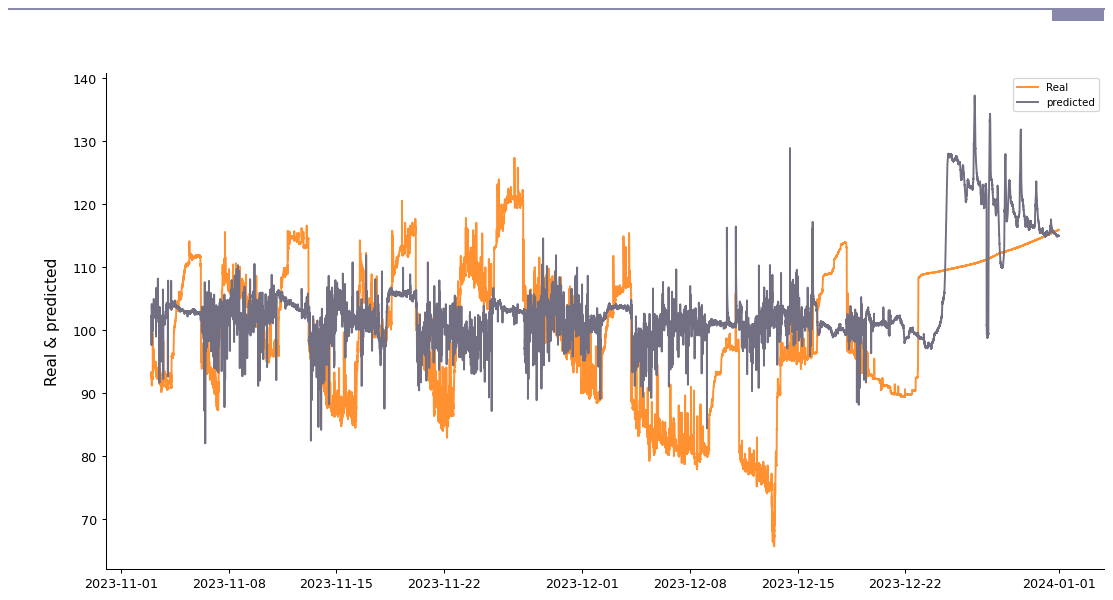

In [23]:
grafikon(linreg_df[-85000:],"real","Real","predicted","predicted",n_graf=2)

In [24]:
from sklearn.ensemble import AdaBoostRegressor

# diff

In [27]:
Ereg=LinearRegression()

In [28]:
ydiff=y.diff()[1:]
Xdiff=X.diff()[1:]

In [29]:
Ereg.fit(Xdiff,ydiff)

LinearRegression()

In [30]:
Ereg.score(Xdiff,ydiff)

3.17590955782876e-05

In [31]:
y_pred=Ereg.predict(Xdiff)

In [32]:
Ereg_df=pd.DataFrame({"real":ydiff,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

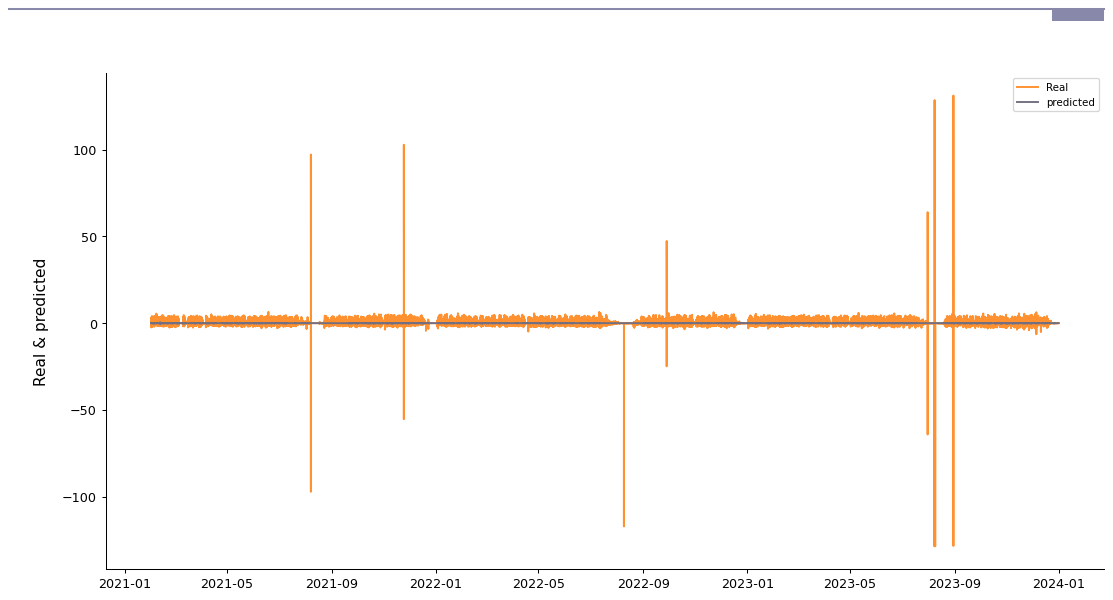

In [33]:
grafikon(Ereg_df[:],"real","Real","predicted","predicted",n_graf=2)

#ötlet: nézzük meg, hogy a szint változás hogyan alakul a jövőben?

In [34]:
y_aggr=ydiff.rolling(window=60).sum()   # 60 perc

In [35]:
y_aggr.dropna(inplace=True)

In [36]:
len(y_aggr)

1531889

In [37]:
Xredim=X[:len(y_aggr)-len(X)]

In [38]:
len(Xredim)

1531889

In [39]:
y_sign=y_aggr.gt(0)

#Classifiers

In [40]:
from sklearn.linear_model import RidgeClassifierCV

In [41]:
A_class=RidgeClassifierCV()

In [42]:
print(len(Xredim))
print(len(y_sign))

1531889
1531889


In [43]:
A_class.fit(Xredim,y_sign)

RidgeClassifierCV()

In [44]:
A_class.score(Xredim,y_sign)

0.5460669800488156

In [45]:
y_pred=A_class.predict(Xredim)

In [46]:
A_class_df=pd.DataFrame({"real":y_sign,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

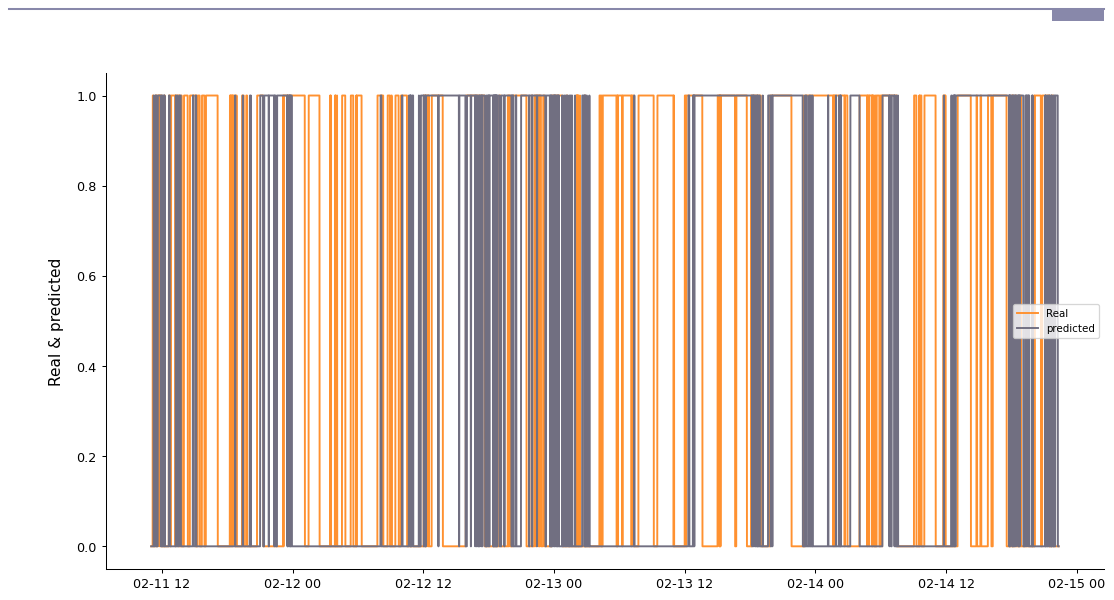

In [47]:
grafikon(A_class_df[15000:20000],"real","Real","predicted","predicted",n_graf=2)

#LazyPredict

In [48]:
!pip install lazypredict

In [49]:
from lazypredict.Supervised import LazyClassifier

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
clf=LazyClassifier()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(Xredim[:10000], y_sign[:10000],test_size=.5,random_state =123)

In [53]:
clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:33<00:00,  1.24it/s]

[LightGBM] [Info] Number of positive: 2446, number of negative: 2554
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5092
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489200 -> initscore=-0.043207
[LightGBM] [Info] Start training from score -0.043207


100%|██████████| 29/29 [00:33<00:00,  1.16s/it]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 ExtraTreesClassifier               0.93               0.93     0.93      0.93   
 RandomForestClassifier             0.93               0.93     0.93      0.93   
 XGBClassifier                      0.90               0.90     0.90      0.90   
 BaggingClassifier                  0.90               0.90     0.90      0.90   
 LGBMClassifier                     0.89               0.89     0.89      0.89   
 DecisionTreeClassifier             0.87               0.87     0.87      0.87   
 LabelPropagation                   0.87               0.87     0.87      0.87   
 LabelSpreading                     0.87               0.87     0.87      0.87   
 ExtraTreeClassifier                0.87               0.87     0.87      0.87   
 KNeighborsClassifier               0.86               0.86     0.86      0.86   
 NuSVC          

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
A_class=ExtraTreesClassifier()

In [56]:
print(len(Xredim))
print(len(y_sign))

1531889
1531889


In [57]:
A_class.fit(Xredim,y_sign)

ExtraTreesClassifier()

In [58]:
A_class.score(Xredim,y_sign)

1.0

In [59]:
y_pred=A_class.predict(Xredim)

In [60]:
A_class_df=pd.DataFrame({"real":y_sign,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

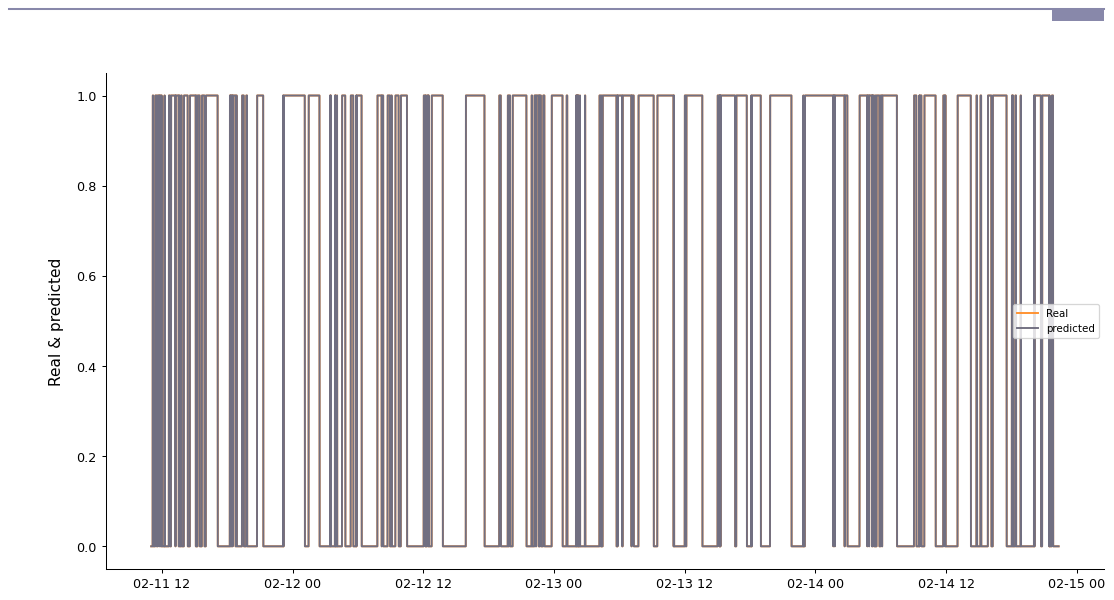

In [61]:
grafikon(A_class_df[15000:20000],"real","Real","predicted","predicted",n_graf=2)